# Кластеризация покупателей

Источник данных - [Kaggle](https://www.kaggle.com/code/gadigevishalsai/mall-customer-segmentation-clustering-analysis/input).

Данные о покупателях шопинг-центра.

## Цель

По имеющимся данным о покупателях разделить их на кластеры, чтобы найти инсайты о потребителях, выявить самых активных, подобрать разные маркетинговые стратегии для разных кластеров.

## Про данные




| Колонка         | Перевод       | Значение             |
|-----------------|---------------|----------------------|
| CustomerID      | id покупателя | id                   |
| Age             | Возраст       | количество лет       |
| Annual Income   | Годовой доход | тысячи долларов      |
| Spending Score  | "Оценка трат" | Значение от 0 до 100 |


## План

1. EDA
2. Модель 1 - K-Means
3. Модель 2 - Hierarchical clustering

## 1
## Importing

In [ ]:
# библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

!pip install imgaug==0.2.5
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.7/562.7 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561439 sha256=44e698af351f4601e4ccc9786f39050eef09a33d13201a108fdcf8e748773526
  Stored in directory: /root/.cache/pip/wheels/6d/6d/83/f4e35acdf97353c35b08f21f198b208916f2b6517bd98476d9
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# данные
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2
## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Gender', ylabel='count'>

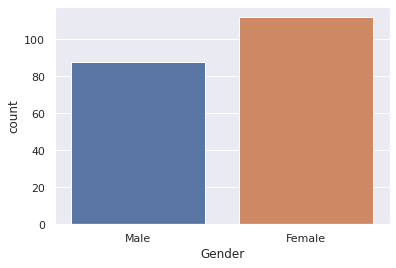

In [ ]:
sns.countplot(df.Gender)

In [ ]:
df = df.rename(columns={'Annual Income (k$)': "Income", "Spending Score (1-100)": "SpendScore"})

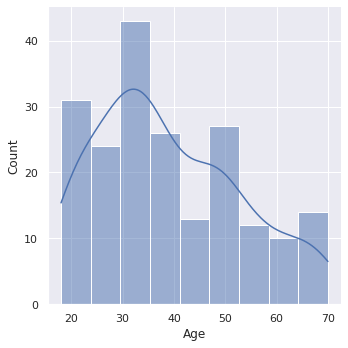

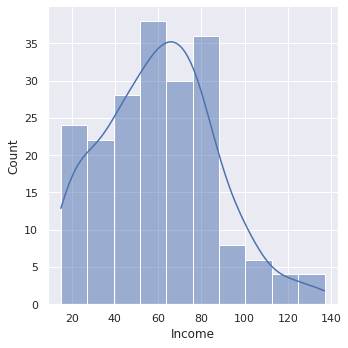

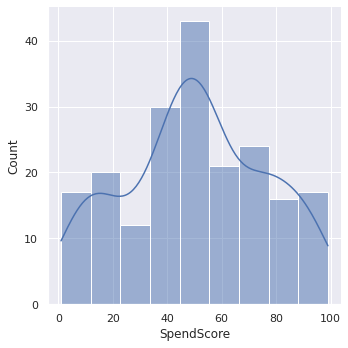

In [ ]:
for i in ['Age', 'Income', 'SpendScore']:
  sns.displot(df[i], kde=True)
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


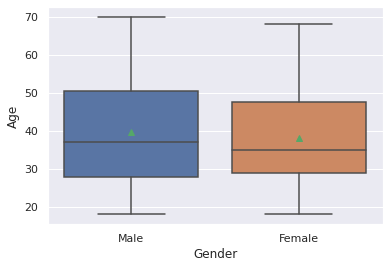

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


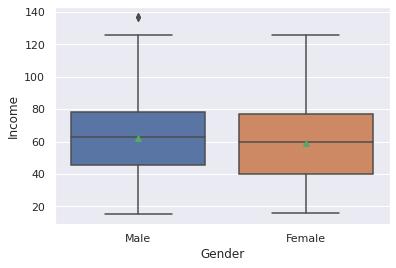

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


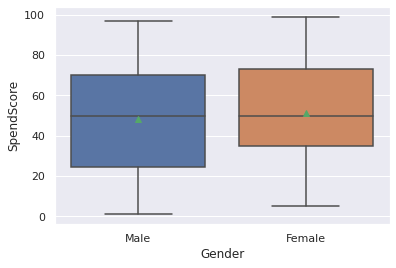

In [ ]:
for i in ['Age', 'Income', 'SpendScore']:
  sns.boxplot(df["Gender"], df[i], showmeans=True)
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Income', ylabel='SpendScore'>

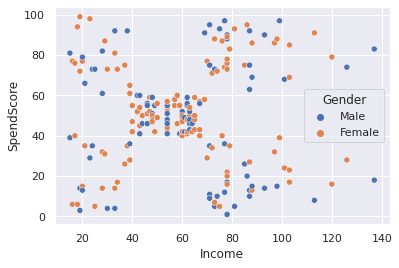

In [ ]:
sns.scatterplot(df['Income'], df['SpendScore'], hue=df['Gender'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age', ylabel='Income'>

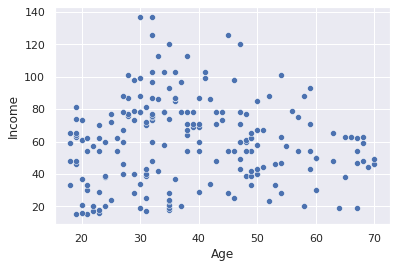

In [ ]:
sns.scatterplot(df['Age'], df['Income'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age', ylabel='SpendScore'>

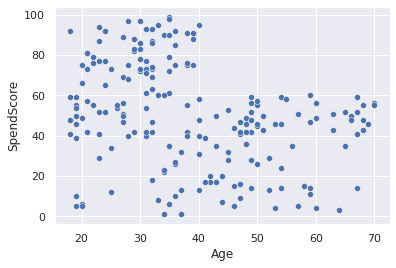

In [ ]:
sns.scatterplot(df['Age'], df['SpendScore'])

Scatter plots не отображают никакого паттерна между парами переменных.

## Подготовка данных для моделирования

In [ ]:
data = df.drop(['CustomerID'], axis=1)

In [ ]:
data.isna().sum()

Gender        0
Age           0
Income        0
SpendScore    0
dtype: int64

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder()

ct = make_column_transformer(
    (scaler, ['Age','Income','SpendScore']),
    (ohe, ['Gender'])
)
data_sc = ct.fit_transform(data)

## Модель 1 - K-means

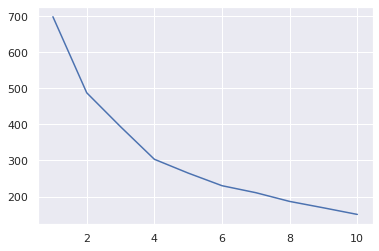

In [ ]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(k)
    kmeans.fit(data_sc)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


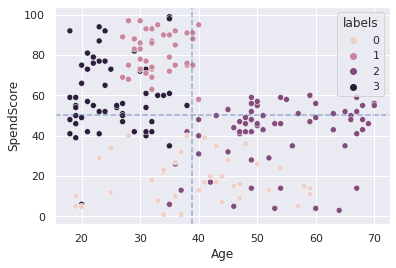

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


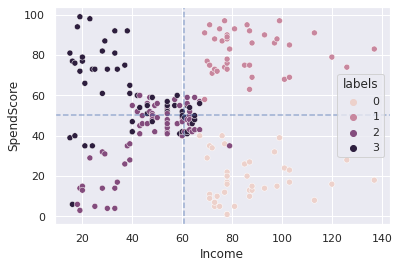

In [ ]:
kmeans = KMeans(4)
labels = kmeans.fit_predict(data_sc)

data['labels'] = labels

for i in ['Age', 'Income']:
    sns.scatterplot(data[i], data['SpendScore'], hue= data['labels'])
    plt.axhline(np.mean(data['SpendScore']), linestyle='--', alpha=0.5)
    plt.axvline(np.mean(data[i]), linestyle='--', alpha=0.5)
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


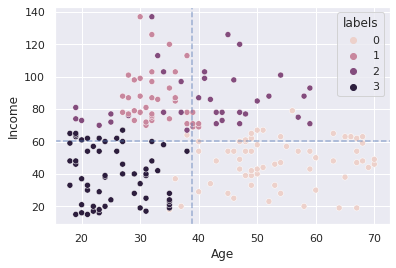

In [ ]:
sns.scatterplot(data['Age'], data['Income'], hue=data['labels'])
plt.axhline(np.mean(data['Income']), linestyle='--', alpha=0.5)
plt.axvline(np.mean(data['Age']), linestyle='--', alpha=0.5)

In [ ]:
kmeans.inertia_

303.33017451214585

In [ ]:
pd.crosstab(data['Gender'], data["labels"], normalize='columns')

labels,0,1,2,3
Gender,,,,
Female,0.575758,0.596491,0.486486,0.55
Male,0.424242,0.403509,0.513514,0.45


In [ ]:
pd.crosstab(data['Gender'], data["labels"], normalize='index')

labels,0,1,2,3
Gender,,,,
Female,0.339286,0.303571,0.160714,0.196429
Male,0.318182,0.261364,0.215909,0.204545


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='labels', ylabel='count'>

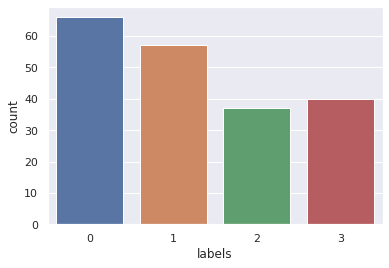

In [ ]:
sns.countplot(data['labels'])

### Описание кластеров:

* 0
  * Возраст: выше среднего
  * Доходы: ниже среднего
  * Рейтинг: ниже среднего

* 1
  * Возраст: ниже среднего
  * Доходы: выше среднего
  * Рейтинг: выше среднего

* 2
  * Возраст: выше среднего
  * Доходы: выше среднего
  * Рейтинг: ниже (или около) среднего

* 3
  * Возраст: ниже среднего
  * Доходы: ниже среднего
  * Рейтинг: выше среднего

### Вывод:

Основные покупатели - молодые люди до 40 (вне зависимости от дохода). Среди основных покупателей больше женщин, чем мужчин (на 10-20 % в каждом кластере).

## Модель 2 - Hierarchy

In [ ]:
data_h = pd.get_dummies(data)

mergings = linkage(data_h, method='complete')


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [213.75, 213.75, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [282.5, 282.5, 321

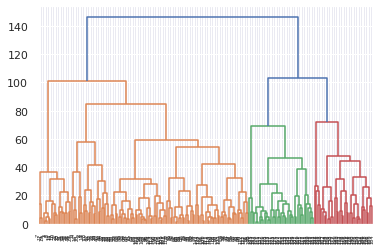

In [ ]:
dendrogram(mergings)

In [ ]:
labels_h = fcluster(mergings, 90, criterion='distance')
labels_h

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


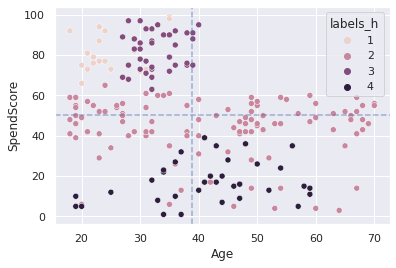

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


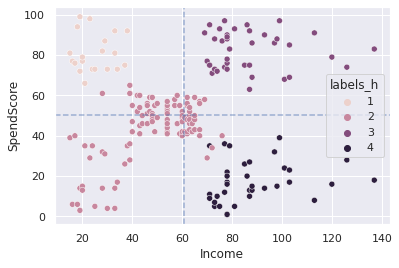

In [ ]:
data['labels_h'] = labels_h

for i in ['Age', 'Income']:
    sns.scatterplot(data[i], data['SpendScore'], hue= data['labels_h'])
    plt.axhline(np.mean(data['SpendScore']), linestyle='--', alpha=0.5)
    plt.axvline(np.mean(data[i]), linestyle='--', alpha=0.5)
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


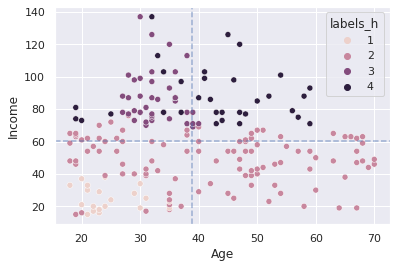

In [ ]:
sns.scatterplot(data['Age'], data['Income'], hue=data['labels_h'])
plt.axhline(np.mean(data['Income']), linestyle='--', alpha=0.5)
plt.axvline(np.mean(data['Age']), linestyle='--', alpha=0.5)

In [ ]:
pd.crosstab(data['Gender'], data["labels_h"], normalize='columns')

labels_h,1,2,3,4
Gender,,,,
Female,0.6,0.603774,0.538462,0.428571
Male,0.4,0.396226,0.461538,0.571429


In [ ]:
pd.crosstab(data['Gender'], data["labels_h"], normalize='index')

labels_h,1,2,3,4
Gender,,,,
Female,0.107143,0.571429,0.187500,0.133929
Male,0.090909,0.477273,0.204545,0.227273


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='labels_h', ylabel='count'>

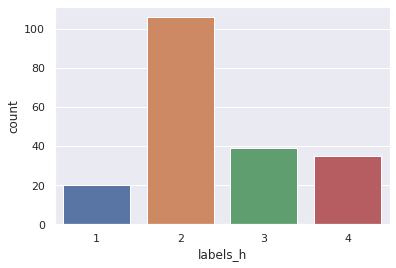

In [ ]:
sns.countplot(data['labels_h'])

### Описание кластеров:

Здесь деление на 4 класса происходит, в основном, на основе Доходов и Рейтинга покупателя.

## Вывод

1. Первая модель (K-means) поделила данные на более сбалансированные кластеры. Хотя общий тренд - молодые люди до 40 покупают больше (вне зависимости от дохода).

2. При этом вторая модель (Hierarchical clustering), в основном, поделила на кластеры на основе Доходов и Рейтинга покупателя. Преобладающий кластер (распределение несбалансированное) - люди с доходом ниже среднего, и с низкой оценкой трат любого возраста.

3. Женщин больше в принципе. И в каждом кластере, кроме тех, кто имеет большой доход и низкие показатели трат, здесь больше мужчин (вне зависимости от возраста).

То есть основные покупатели на данный момент - это молодые люди до 40 лет и женщины любого возраста.